In [3]:
%load_ext autoreload
%autoreload 2
import pandas as pd
from utils.dim_red_utils import pca_to_umap
import json

In [26]:
words_df = pd.read_csv("playground_BERT_embeddings.csv")
mols_df = pd.read_csv("playground_enamine_fingerprints.csv")

mols_df = mols_df[:10000]
words_df = words_df[:5000]

words_df["BERT_Embedding"] = words_df["BERT_Embedding"].apply(json.loads)
mols_df["Morgan_fingerprint"] = mols_df["Morgan_fingerprint"].apply(json.loads)

molecular_fingerprints = pca_to_umap(mols_df, col_name="Morgan_fingerprint")
bert_embeddings = pca_to_umap(words_df, col_name="BERT_Embedding")

/opt/anaconda3/envs/nlp_env/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/opt/anaconda3/envs/nlp_env/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [44]:
%%time
from utils.clustering_utils import recursive_kmeans_clustering
from functools import partial


bert_clusters, mol_clusters, mapping = recursive_kmeans_clustering(
    bert_embeddings, molecular_fingerprints, 
)
print(len(mapping))

Top-Level Clustering: 100%|██████████| 2/2 [00:03<00:00,  1.88s/it]

3035
CPU times: user 18.1 s, sys: 1.36 s, total: 19.5 s
Wall time: 3.79 s


In [23]:
# %%time
# from utils.clustering_utils import recursive_grouping_and_clustering, get_divisive_clusters, size_mapping, get_kmeans_cluster, hungarian_mapping

# bert_clusters, mol_clusters, mapping = recursive_grouping_and_clustering(
#     bert_embeddings, molecular_fingerprints, clustering_method=get_kmeans_cluster,
#     mapping_method=hungarian_mapping
# )
# print(len(mapping))

Top-Level Clustering: 100%|██████████| 2/2 [00:08<00:00,  4.27s/it]

269
CPU times: user 1min 6s, sys: 7.29 s, total: 1min 13s
Wall time: 8.58 s


In [45]:
mols_df['Cluster'] = 0
mols_df['Word'] = ''

for word_idx, mol_idx in mapping.items():
    mols_df.at[mol_idx, 'Cluster'] = 1
    mols_df.at[mol_idx, 'Word'] = words_df.at[word_idx, 'Word']

mols_df

,Unnamed: 0,SMILES,ZINC_ID,Morgan_fingerprint,UMAP1,UMAP2,Cluster,Word,PCA1,PCA2,color
0,64344,CCI,EN300-18902,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.104984,-0.008901,0,,5.058487,7.186898,0
1,67918,CCN,EN300-19583,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2.370481,-4.714182,0,,5.365092,6.971321,0
2,70676,CCS,EN300-20602,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",12.498261,-6.164637,1,garden,1.943545,7.792532,1
3,80053,CSSC,EN300-36043,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.521301,-0.038971,0,,4.290343,8.329906,0
4,66461,CCCI,EN300-19282,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.042813,-0.044903,0,,5.046639,7.073883,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,89463,c1c(ncnc1Cl)N,EN300-53040,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",7.006664,-2.009837,0,,-8.877515,0.386181,0
9996,65447,Cn1ccc(n1)CBr,EN300-190964,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",9.635611,1.771862,0,,1.347657,20.316542,1
9997,386901,CC1CCCC(C1S)C,EN300-1288623,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",7.780742,-6.498494,0,,0.398988,-1.399651,1
9998,23528,c1c(nc[nH]1)F,EN300-120752,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",7.109181,-2.409015,0,,-6.982575,1.380702,0


In [46]:
from utils.viz_utills import visualize_chem_embeddings

# mols_df['Cluster'] = mol_clusters_2
visualize_chem_embeddings(mols_df, hover_cols=["ZINC_ID", "SMILES", "Word"], cluster_col='Cluster', words_col='Word')

# TODO: try rather than doing anything fancy like the divisive clustering, just try K-means...

/opt/anaconda3/envs/nlp_env/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [50]:
playground_dataset_df = mols_df[mols_df['Word'] != '']
playground_dataset_df.to_csv('datasets/playground_dataset.csv')

# TODO: Do the vanity listings...

Like "H2O" --> "Life"
Glucose --> "Food"
Caffeine --> "Energy"


In [ ]:
break

### Okay all these clustering algorithms aren't working well so let's try something homespun
we'll first cluster with DBSCAN all of the words & all of the chemicals separately
gonna want to find a way to specify eps such that we don't have to manually tune things too much

then we'll force a unique mapping with the Hungarian mapping method.

Then within each cluster we will do something lazy like similarity matching for the most closest matches
^ TODO: this lazy approach may not work well! we may want something more sophisticated

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import cosine_similarity
from scipy.optimize import linear_sum_assignment

In [ ]:
from utils.viz_utills import visualize_chem_embeddings
from utils.clustering_utils import divisive_clustering

molecule_clusters = divisive_clustering(molecular_fingerprints, percentile=3)

mols_df['Cluster'] = molecule_clusters
visualize_chem_embeddings(mols_df, cluster_col='Cluster')

/opt/anaconda3/envs/nlp_env/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [ ]:
max(molecule_clusters)

230

In [ ]:
from utils.viz_utills import visualize_word_embeddings
from sklearn.cluster import KMeans

# dbscan_word = DBSCAN(eps=0.5, min_samples=10, metric='euclidean')
# word_clusters = dbscan_word.fit_predict(word_embeddings)
# num_clusters = 100  # Adjust the number of clusters as needed
# kmeans = KMeans(n_clusters=num_clusters, random_state=42)
# word_clusters = kmeans.fit_predict(word_embeddings)

word_clusters = divisive_clustering(word_embeddings, percentile=25)

words_df['Cluster'] = word_clusters
visualize_word_embeddings(words_df)
print(max(word_clusters))

/opt/anaconda3/envs/nlp_env/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [ ]:
word_cluster_labels = np.unique(word_clusters)
molecule_cluster_labels = np.unique(molecule_clusters)


# Compute centroids for each cluster
def compute_centroids(data, labels, cluster_labels):
    centroids = []
    for label in cluster_labels:
        cluster_points = data[labels == label]
        centroid = np.mean(cluster_points, axis=0)
        centroids.append(centroid)
    return np.array(centroids)


word_centroids = compute_centroids(word_embeddings, word_clusters, word_cluster_labels)
molecule_centroids = compute_centroids(
    molecular_fingerprints, molecule_clusters, molecule_cluster_labels
)

In [ ]:
# Step 2: Hungarian Algorithm for Matching
similarity_matrix = cosine_similarity(word_centroids, molecule_centroids)
cost_matrix = 1 - similarity_matrix
row_ind, col_ind = linear_sum_assignment(cost_matrix)

In [ ]:
# Step 3: Map Words to Molecules
word_to_molecule_mapping = {}

for word_cluster_idx, molecule_cluster_idx in zip(row_ind, col_ind):
    word_cluster_members = np.where(word_clusters == word_cluster_idx)[0]
    molecule_cluster_members = np.where(molecule_clusters == molecule_cluster_idx)[0]
    
    for word_member in word_cluster_members:
        # Find the closest molecule within the assigned cluster
        word_embedding = word_embeddings[word_member]
        molecule_embeddings = molecular_fingerprints[molecule_cluster_members]
        
        similarities = cosine_similarity([word_embedding], molecule_embeddings)[0]
        best_match_idx = np.argmax(similarities)
        best_molecule = molecule_cluster_members[best_match_idx]
        
        word_to_molecule_mapping[word_member] = best_molecule

In [ ]:
# Print or process the mapping
print("Word to molecule mapping:")
for word_idx, molecule_idx in list(word_to_molecule_mapping.items())[:10]:  # Display the first 10 mappings
    print(f"Word {words_df.iloc[word_idx]['Word']} -> Molecule {mols_df.iloc[molecule_idx]['SMILES']}")

Word to molecule mapping:
Word israel -> Molecule CNC1CCC1OC
Word state -> Molecule CNC1CCC1OC
Word jerusalem -> Molecule CNC1CCC1OC
Word town -> Molecule CNC1CCC1OC
Word egypt -> Molecule CNC1CCC1OC
Word coast -> Molecule CNC1CCC1OC
Word england -> Molecule CNC1CCC1OC
Word america -> Molecule CNC1CCC1OC
Word county -> Molecule CNC1CCC1OC
Word washington -> Molecule CNC1CCC1OC


## We'll try Gromov-Wasserstein Optimal Transport first... let's see how that does.
## trying to minimize the discrepancy in pairwise distances within each distribution, thus preserving local structure.

In [ ]:
import numpy as np
import ot

# molecular_fingerprints = np.array(mols_df['Morgan_fingerprint'].tolist())
# word_embeddings = np.array(words_df['BERT_Embedding'].tolist())

molecular_fingerprints_normalized = molecular_fingerprints / np.linalg.norm(molecular_fingerprints, axis=1, keepdims=True)
word_embeddings_normalized = word_embeddings / np.linalg.norm(word_embeddings, axis=1, keepdims=True)

C1 = ot.dist(word_embeddings_normalized, word_embeddings_normalized, metric='euclidean')
C2 = ot.dist(molecular_fingerprints_normalized, molecular_fingerprints_normalized, metric='euclidean')

In [ ]:
# Min-Max Normalization for C1
C1_min, C1_max = C1.min(), C1.max()
C1_normalized = (C1 - C1_min) / (C1_max - C1_min)

# Min-Max Normalization for C2
C2_min, C2_max = C2.min(), C2.max()
C2_normalized = (C2 - C2_min) / (C2_max - C2_min)

In [ ]:
# Standard Deviation and Mean Normalization for C1
C1_mean = np.mean(C1)
C1_std = np.std(C1)
C1_normalized = (C1 - C1_mean) / C1_std

# Standard Deviation and Mean Normalization for C2
C2_mean = np.mean(C2)
C2_std = np.std(C2)
C2_normalized = (C2 - C2_mean) / C2_std

In [ ]:
p = (
    np.ones((word_embeddings_normalized.shape[0],))
    / word_embeddings_normalized.shape[0]
)
q = (
    np.ones((molecular_fingerprints_normalized.shape[0],))
    / molecular_fingerprints_normalized.shape[0]
)

gw_plan = ot.gromov.gromov_wasserstein(
    C1,
    C2,
    p,
    q,
    "square_loss",
    epsilon=1e-3,
    max_iter=2000,
    tol=1e-8,
)

/opt/anaconda3/envs/nlp_env/lib/python3.9/site-packages/ot/lp/__init__.py:354: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)


In [ ]:
word_to_molecule_mapping = np.argmax(gw_plan, axis=1)

In [ ]:
word_to_molecule_mapping

array([0, 0, 0, ..., 0, 0, 0])

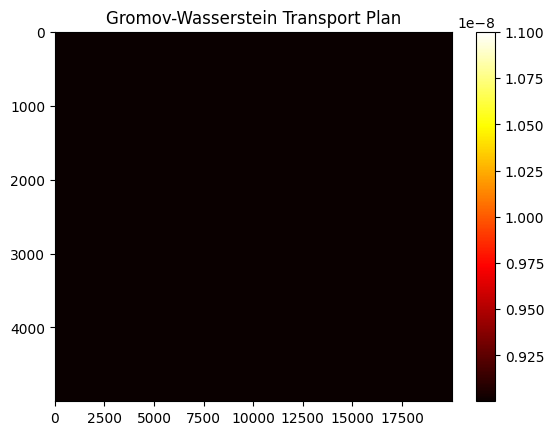

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(gw_plan, aspect='auto', cmap='hot')
plt.colorbar()
plt.title('Gromov-Wasserstein Transport Plan')
plt.show()
